In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

_Variance_ of a data indicates how dispersed the data is from the mean. In this notebook, two variability measures - _range_ and _interquartile range (IQR)_ will be discussed.

Interquartile range provides a rough measure of the variability of the distribution. This measure is better than measuring with the range. As range is a difference between the maximum and minimum value of the data points, it can be influenced greatly by outliers.

In [46]:
x1 = np.random.normal(0,0.5,100)
x2 = np.random.normal(0,0.5,100)
x2 = np.append(x2,5)

Let's say we have the following distributions:

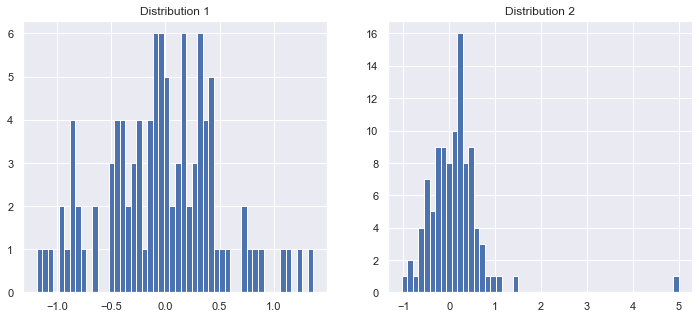

In [47]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution 1')
plt.hist(x1,bins=50)
plt.subplot(1,2,2)
plt.title('Distribution 2')
plt.hist(x2,bins=50)
plt.show()

In [48]:
# Measuring variability with range
dist1_range = x1.max() - x1.min()
dist2_range = x2.max() - x2.min()

print(f'Distribution 1 range: {dist1_range}')
print(f'Distribution 2 range: {dist2_range}')

Distribution 1 range: 2.5568512018725307
Distribution 2 range: 6.029438669362012


As seen in the histograms, **distribution 2** has an outlier despite having the same standard deviation if the outlier is excluded. The range calculated for both **distribution 1** and **distribution 2** are approximately 2.55 and 6.03 respectively. The outlier has influenced the variability measure greatly, which is misleading as both distributions have similar variability.

Alternatively, we can use the _interquartile range_ to measure variability. The interquartile range does **not** take into account of outliers, which provides a good measure of variability of the data.

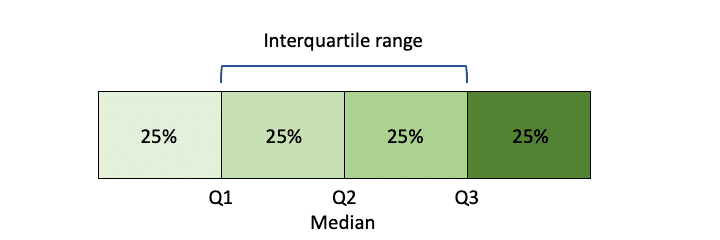

The dataset is sorted in ascending order and split into 4 quartiles. As seen in the image above, the interquartile range is the difference between Q3 and Q1. To calculate the interquartile range, we need to do the following:

1. Sort the data in ascending order and find the median.
2. After finding the median, split the data in half and find the median for both halves.
3. The two medians in step 2 found will be the value for Q1 and Q3 respectively.

Finally,
$$\text{Interquartile range}= Q3 - Q1$$

In [128]:
def find_median(x):
    N = len(x)
    median = 0
    
    if N % 2 != 0:
        idx = int(N / 2)   # Index of the median
        median = x[idx]
    else:
        idx = int(N / 2)
        median = (x[idx - 1] + x[idx]) / 2
    
    return median

In [121]:
def calculate_iqr(x):
    x.sort()
    N = len(x)
    N_half = int(N / 2)
    first_half,second_half = [0,0]
    
    # Obtain the median of the first and second half after splitting the data in half
    if N % 2 == 0:
        first_half = x[:N_half]
        second_half = x[N_half:]
    else:
        first_half = x[:N_half]
        second_half = x[N_half + 1:]
    
    # IQR = Q3 - Q1
    q1 = find_median(first_half)
    q3 = find_median(second_half)

    return q3 - q1

For example, let's say we have the following data:

$$23,25,28,28,32,33,35$$


We first split the data in half, we get:

$$\text{First half}=23,25,28$$
$$\text{Second half}=32,33,35$$

We then take the median of each half:

$$Q1 = 25,Q2 = 33$$

Finally, we can obtain the IQR by taking the difference between Q3 and Q1:

$$IQR = 33 - 25 = 8$$

In [126]:
values = [23,25,28,28,32,33,35]
print(f'IQR: {calculate_iqr(values)}')

IQR: 8


#### In the previous example, our range is:

Distribution 1: 2.55

Distribution 2: 6.03

The IQR for the distributions are:

In [129]:
iqr1 = calculate_iqr(x1)
iqr2 = calculate_iqr(x1)

print(f'IQR for distribution 1: {iqr1}')
print(f'IQR for distribution 2: {iqr2}')

IQR for distribution 1: 0.6853553989375837
IQR for distribution 2: 0.6853553989375837


We obtain the exact same IQR for both distributions as data points in Q1 an Q3 are not taken into account. This shows that the _interquartile range_ is a better measure for variability than range as it is not affected by outliers.

With a boxplot, we can visualize the distribution.

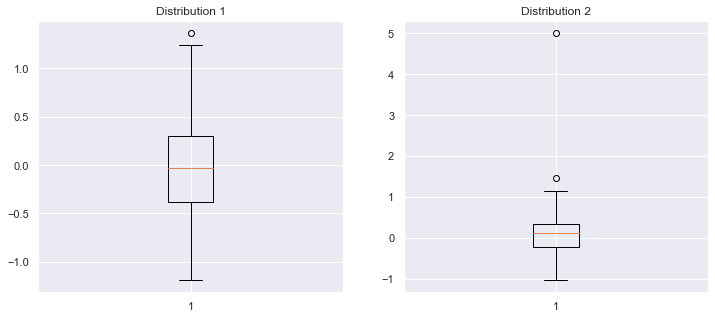

In [132]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution 1')
plt.boxplot(x1)
plt.subplot(1,2,2)
plt.title('Distribution 2')
plt.boxplot(x2)
plt.show()

The red line in the boxplot represent the median for the data; with Q3 above the red line, and Q1 below it. The circle represents the outlier in the data.
The horizontal line above the top whisker represents the maximum value of the data, and the horizontal line below the bottom whisker is the minimum. 

Any value that is **above**:

$$Q3 + 1.5 \cdot \text{IQR}$$

or **below**:

$$Q1 - 1.5 \cdot \text{IQR}$$

is an outlier.